In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Cleaning Data**



**Description:**



Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete
data within a dataset. Messy data leads to unreliable outcomes. Cleaning data is an essential
part of data analysis, and demonstrating your data cleaning skills is key to landing a job. Here
are some projects to test out your data cleaning skills: 


**Key Concepts and Challenges:**

**Data Integrity:** Ensuring the accuracy, consistency, and reliability of data throughout the cleaning process.

**Missing Data Handling:** Dealing with missing values by either imputing them or making informed decisions on how to handle gaps in the dataset.

**Duplicate Removal:** Identifying and eliminating duplicate records to maintain data uniqueness.

**Standardization:** Consistent formatting and units across the dataset for accurate analysis.

**Outlier Detection:** Identifying and addressing outliers that may skew analysis or model performance.

![](/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png)

In [3]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

**Miising Values**

In [6]:
# Columns missing values report
df.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [7]:
# Columns missing values Evaluation
missing_columns_evalution = df.isna().sum().reset_index().rename(columns={'index':'features', 0:'num_mising_values'})
missing_columns_evalution['mising values in Perct'] = round(missing_columns_evalution.num_mising_values / df.shape[0] * 100, 2)
missing_columns_evalution

,features,num_mising_values,mising values in Perct
0,id,0,0.00
1,name,16,0.03
2,host_id,0,0.00
3,host_name,21,0.04
4,neighbourhood_group,0,0.00
5,neighbourhood,0,0.00
6,latitude,0,0.00
7,longitude,0,0.00
8,room_type,0,0.00
9,price,0,0.00


In [8]:
col_with_mising_values = [col for col in df.columns if df[col].isna().any() == True]
col_with_mising_values

['name', 'host_name', 'last_review', 'reviews_per_month']

In [9]:
df.dropna(subset=['name', 'host_name'], how='any', axis=0, inplace=True,)

In [10]:
df.fillna(method='ffill', inplace=True)

/tmp/ipykernel_18/3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [11]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
df.shape

(48858, 16)

**Standardization:**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     48858

In [14]:
# convert last_review to  date format
df.last_review = pd.to_datetime(df.last_review)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  number_

**Data Integrity**

In [16]:
cat_col = [col for col in df.columns if df[col].dtypes == "O"]
for col in cat_col:
    print(col, ' :', df[col].unique(), '\n\n')

name  : ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"] 


host_name  : ['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel'] 


neighbourhood_group  : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'] 


neighbourhood  : ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushi

**Duplicate Removal**

In [17]:
df.duplicated().any()

False

### **IQR Based Filtering**
**Used when our data distribution is skewed.**

#### **For Skewed Distributions**
**Use Inter-Quartile Range (IQR) proximity rule.
The data points that fall below Q1 – 1.5 IQR or above the third quartile Q3 + 1.5 IQR are outliers, where Q1 and Q3 are the 25th and 75th percentile of the dataset, respectively. IQR represents the inter-quartile range and is given by Q3 – Q1.**

/tmp/ipykernel_18/609497423.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['availability_365'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/609497423.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

F

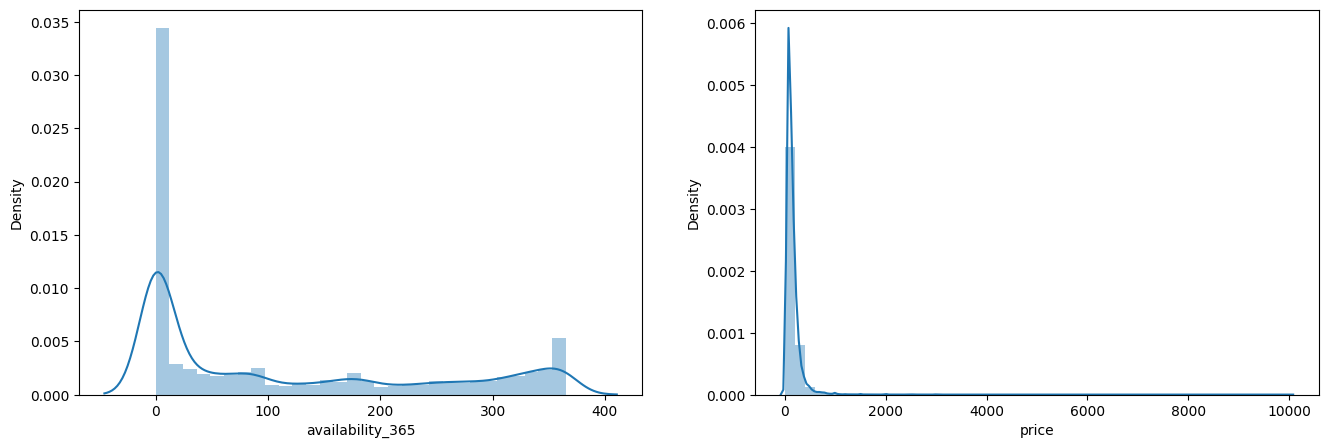

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['availability_365'])
plt.subplot(1,2,2)
sns.distplot(df['price'])
plt.show()

In [19]:
num_col = df.select_dtypes(include=[float, int]).columns

In [20]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,5))
def plots(df, content):
    ax = sns.boxplot(df[content])
    plt.show()
        

    

<Figure size 1600x500 with 0 Axes>

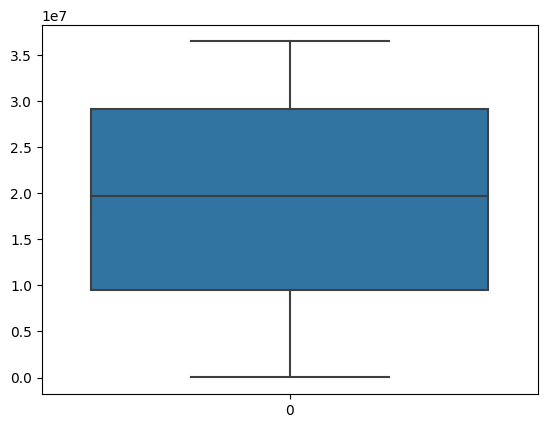

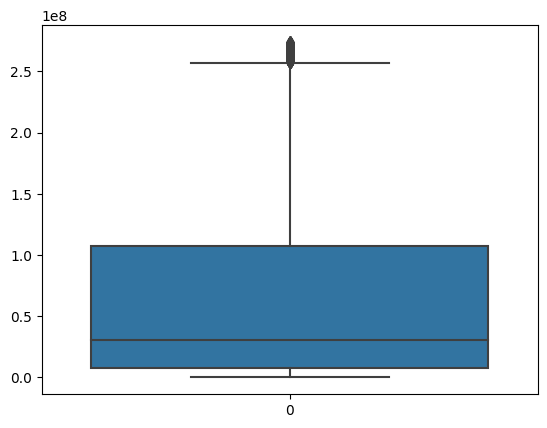

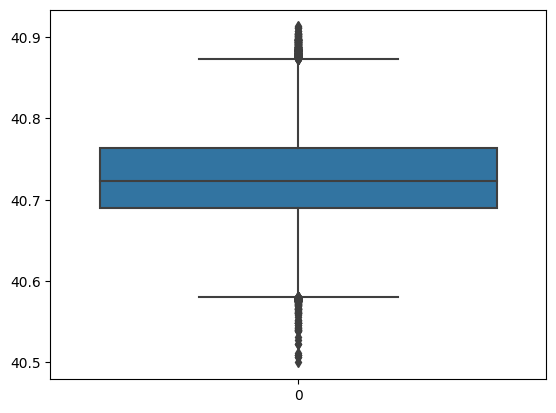

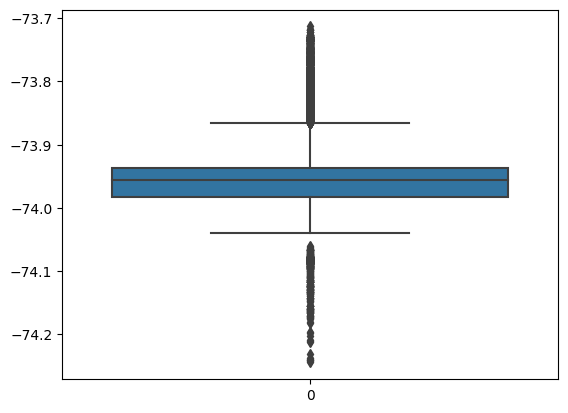

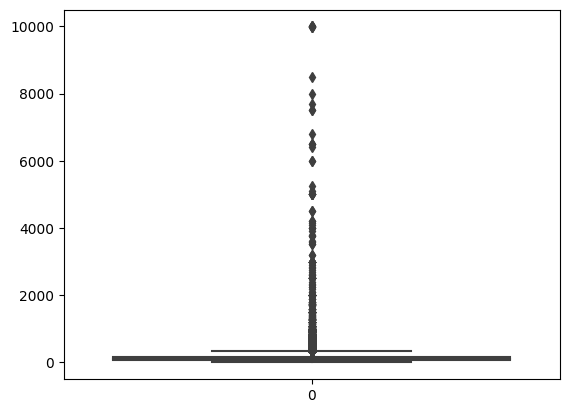

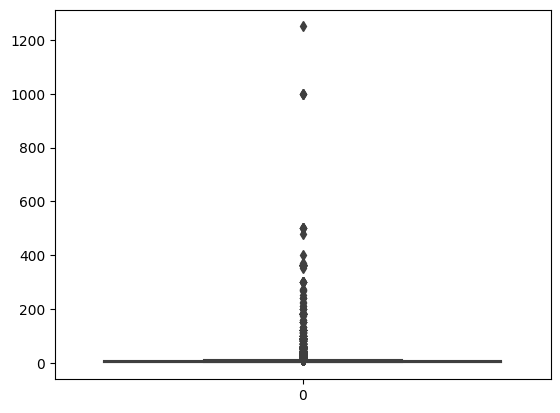

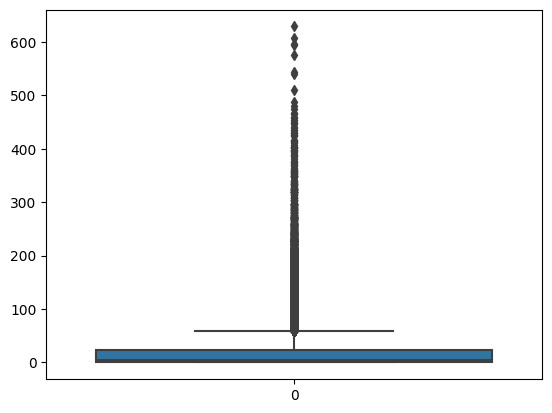

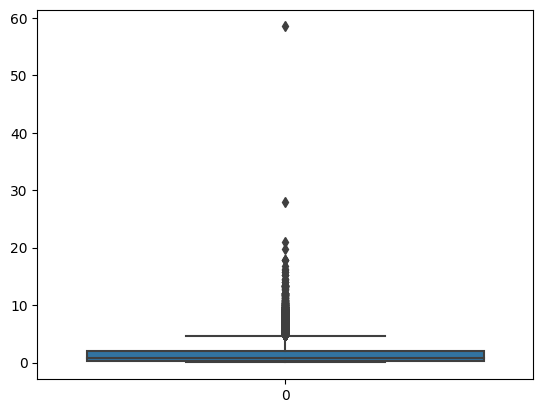

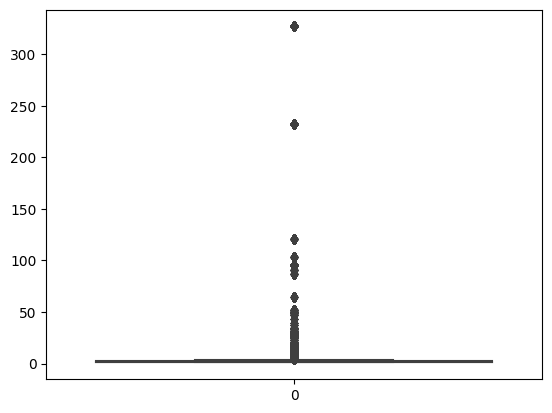

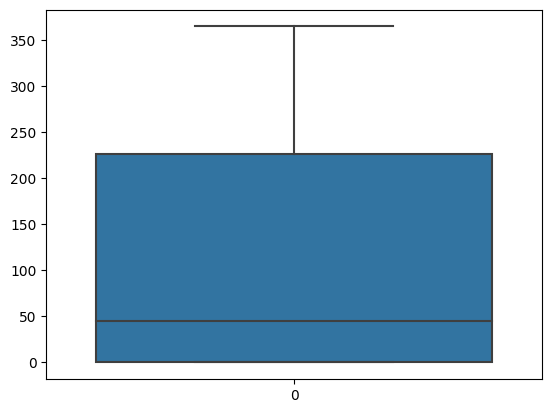

In [21]:
for col in num_col:
    plots(df, col)

In [22]:
def trimm_outliers(df, features):
    df = df
    for col in features:
        percentile25 = df[col].quantile(0.25)
        percentile75 = df[col].quantile(0.75)
        iqr = percentile75 - percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr

        # create the filter
        
        ##finding outliers
        outliers = df[(df[col] > upper_limit) & (df[col] < lower_limit)]
        
        ## Trimming outliers method
        df = df[(df[col] < upper_limit) & (df[col] > lower_limit)]
        
    return df


In [23]:
new_df = trimm_outliers(df, num_col)
new_df.shape

(23312, 16)

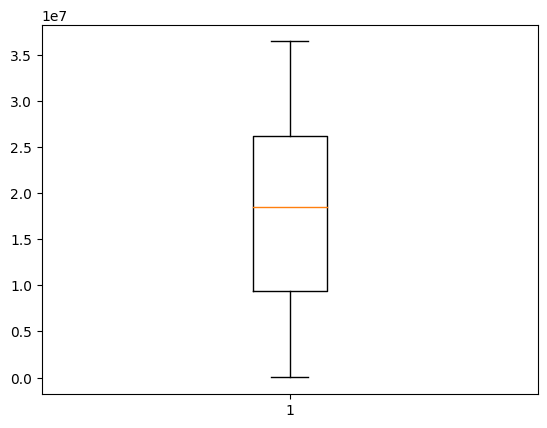

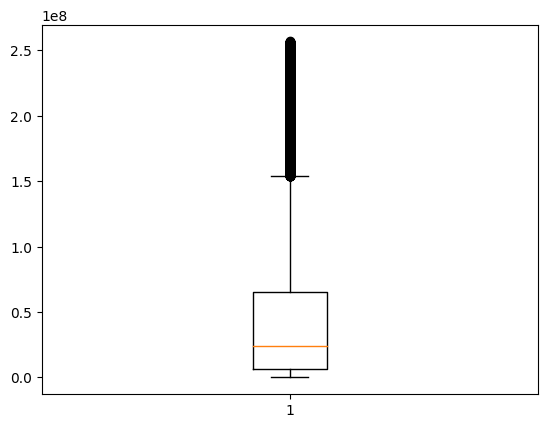

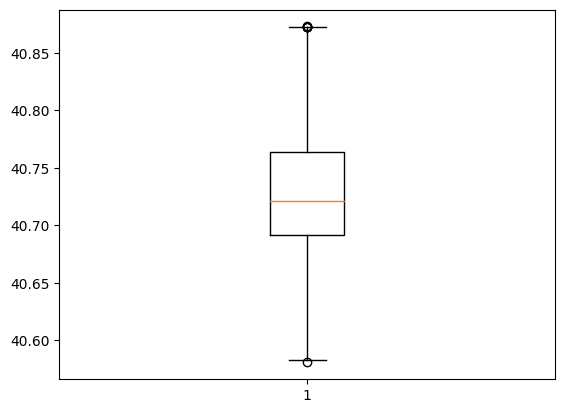

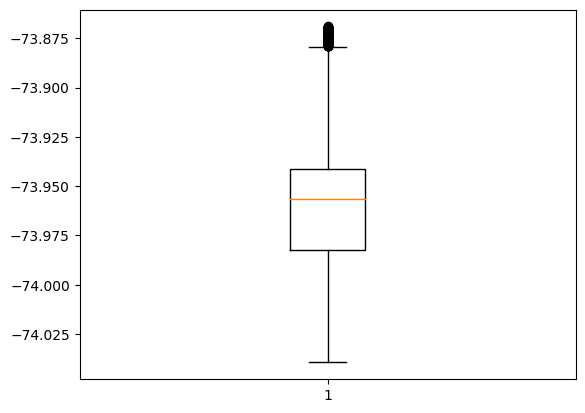

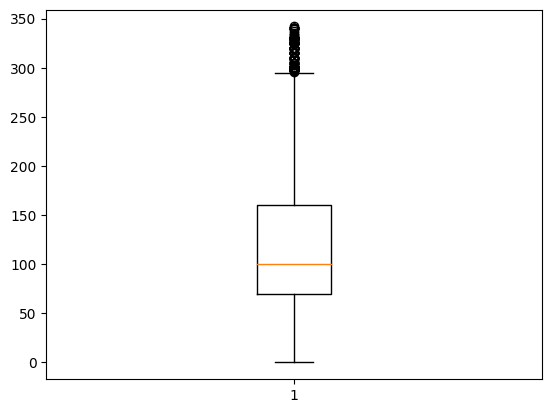

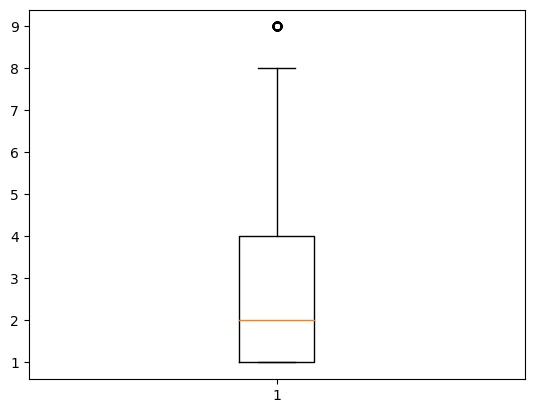

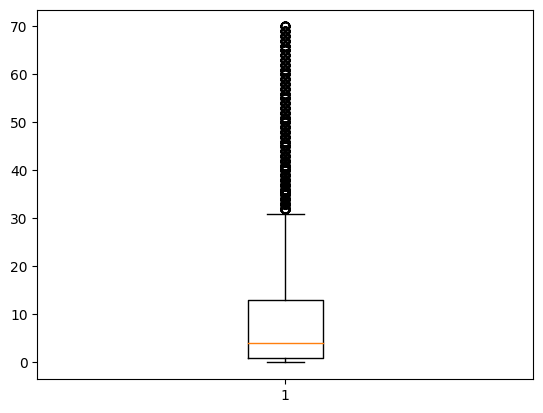

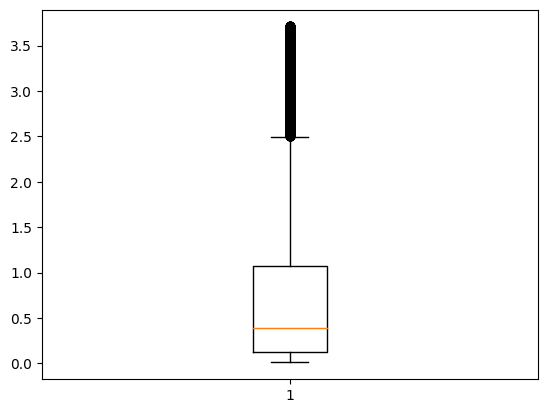

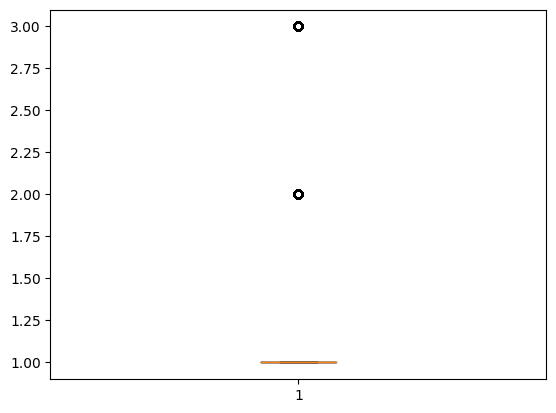

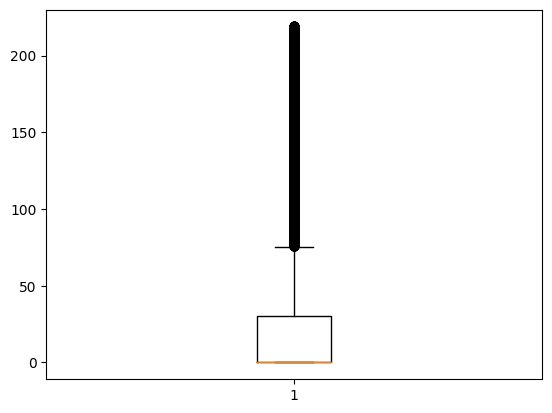

In [24]:
for col in num_col:
    plt.boxplot(new_df[col])
    plt.show()